In [1]:
import pandas as pd
from scipy.io import arff
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import chi2

import erlc as e
import dataPipeline as dp
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
dataPipeline = dp.DataPipeline()

In [3]:
data = dataPipeline.loadData(num_sets = 15)

Loading dataset #1
Loading dataset #2
Loading dataset #3
Loading dataset #4
Loading dataset #5
Loading dataset #6
Loading dataset #7
Loading dataset #8
Loading dataset #9
Loading dataset #10
Loading dataset #11
Loading dataset #12
Loading dataset #13
Loading dataset #14
Loading dataset #15
Finished Loading. Final Size = (78377, 129)


In [4]:
X, y = dataPipeline.dataProc(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Model

In [5]:
erlc = e.ERLC()

## Chi Test

In [6]:
final_chi, top_features = erlc.chi_test(X[:,1:X.shape[1]], y)

In [7]:
final_chi

array([[1.47449305e-01, 9.82605491e-01, 7.55320530e-02, ...,
        9.89470876e-01, 7.76614582e-01, 1.00000000e+00],
       [6.12124483e-02, 9.97244118e-01, 4.28035440e-02, ...,
        9.81230943e-01, 9.11362125e-01, 9.05857465e-14],
       [5.11834831e-01, 8.24909217e-01, 1.04090310e-01, ...,
        9.70382352e-01, 8.32261425e-01, 2.58124483e-04],
       ...,
       [8.72548044e-02, 7.05555604e-01, 6.49787863e-02, ...,
        9.77639875e-01, 7.55939898e-01, 9.25961037e-08],
       [2.46568950e-02, 9.93891412e-01, 7.93418073e-02, ...,
        9.72235588e-01, 8.66985171e-01, 1.00000000e+00],
       [1.30519897e-01, 6.09597223e-01, 6.17553492e-05, ...,
        9.75957057e-01, 8.34097111e-01, 1.00000000e+00]])

## Heatmap of Chi-test result

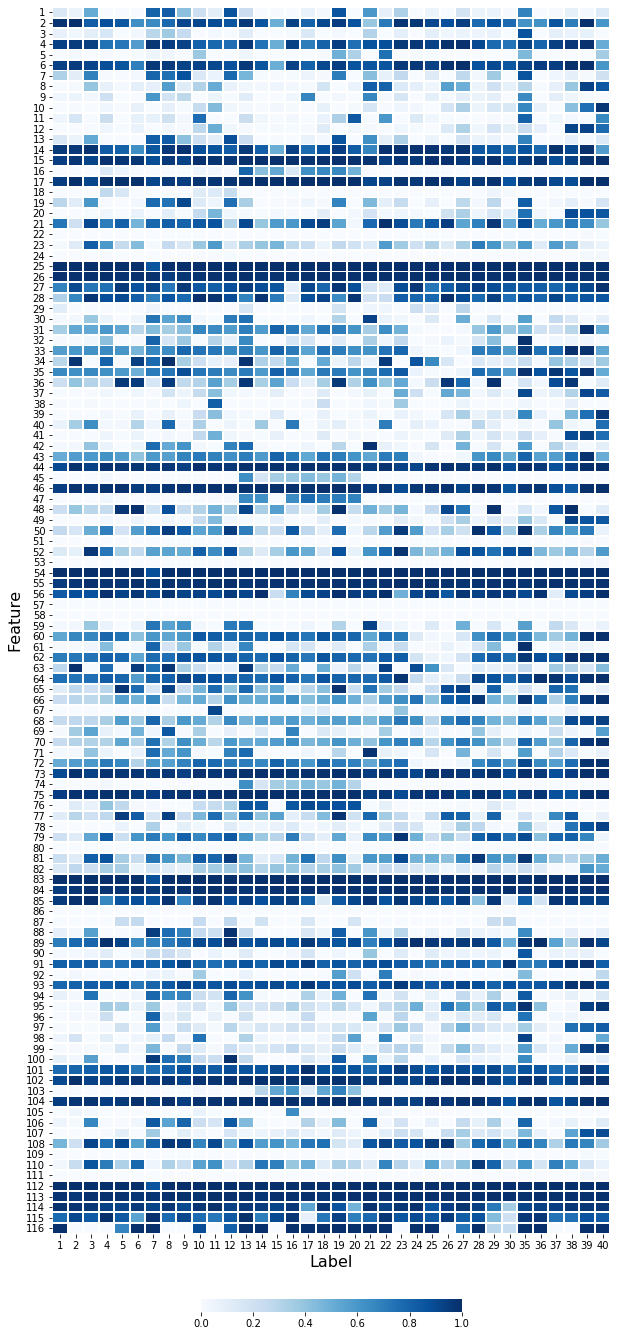

In [13]:
plt.figure(figsize=(10,24))
x_axis_labels = np.unique(y)
x_axis_labels = x_axis_labels[:-1]
y_axis_labels = dataPipeline.getFeatureLabels(data)
sns.heatmap(np.transpose(final_chi), yticklabels = range(1,117),
            xticklabels = x_axis_labels,
            cmap="Blues", 
#             center = 0.000001,
            cbar_kws={"shrink": 1, "orientation": "horizontal", "pad": 0.05, "fraction": 0.01},
            linewidths = 0.8)
plt.xlabel("Label", fontsize=16)
plt.ylabel("Feature", fontsize=16)
plt.savefig('output/chi_heatmap.pdf')

In [14]:
top_features

array([[ 85,  52,  56,  79,  86,  50,  44,  73,  57, 108],
       [ 28,  57,  86,  85,  56, 115,  21,  50,  52,  79],
       [ 85,  56,  21,  50,  17,  15,  23,  52,  79, 108],
       [ 28,  57, 110, 108,  86,  85, 115,  56, 102, 104],
       [ 28,   8,  85, 110,  56, 108,  57,  37,  79,  66],
       [ 79,  44,  56,  28,  57,  73,  85,  50,  21,  46],
       [ 57,  86,  56,  85,  44,  17,  15,  21,  23,  50],
       [ 28,  57,  86,  85,  56,  50, 115,  23,  21,  44],
       [ 56,  21,  44,  46,  50,  85,  52,  73,  79, 108],
       [ 28,  21,   2, 110, 108,  57,  50,  79,  85,  56],
       [ 28,  57,  86,  85, 115,  91,  56,  79,   4, 108],
       [ 28,  66,  57,  79,  37,  56,  85, 110, 104, 108],
       [ 66, 104,  37,  57,  86,  17,  85,  50, 102,  56],
       [104,  28,  17,  57,  85,  56,  79,  95,   8,  37],
       [ 17,  57, 104,  86,  85,  75,  56,  46,  28, 115],
       [ 52,  21,  28,  37,  50,  86,  85,  57,  66,  56],
       [ 28,  17,  85,  57,  56, 108,  79, 110,  50,  91

In [15]:
np.unique(top_features[:,0]).shape

(13,)

In [16]:
final_chi2, top_features2 = erlc.chi_test(X[:,np.unique(top_features)], y)

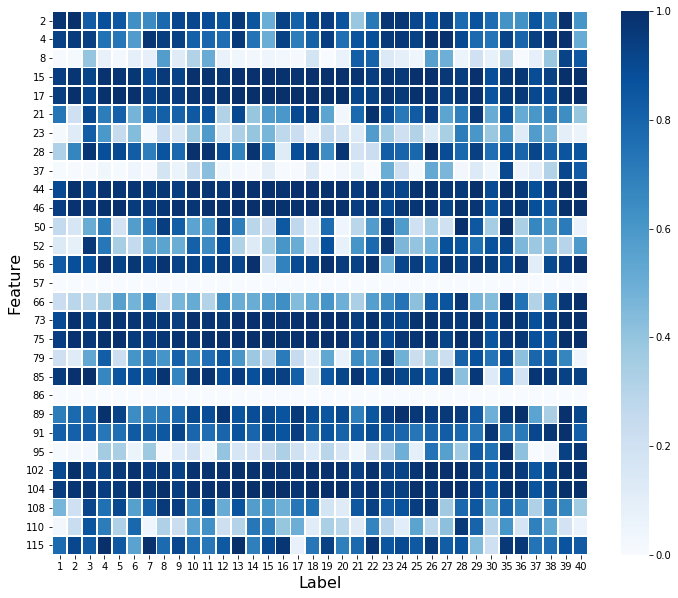

In [30]:
plt.figure(figsize=(12,10))
x_axis_labels = np.unique(y)
x_axis_labels = x_axis_labels[:-1]
sns.heatmap(np.transpose(final_chi2), yticklabels = np.unique(top_features),
            xticklabels = x_axis_labels,
            cmap="Blues", 
#             center = 0.000001,
#             cbar_kws={"shrink": 1, "orientation": "horizontal", "pad": 0.05, "fraction": 0.01},
            linewidths = 0.8)
plt.xlabel("Label", fontsize=16)
plt.ylabel("Feature", fontsize=16)
plt.savefig('output/chi_heatmap_reduced.pdf')

## Testing Localization

In [26]:
final_chi_tr, top_features_tr = erlc.chi_test(X_train[:,1:X.shape[1]], y_train)
final_chi_te, top_features_te = erlc.chi_test(X_test[:,1:X.shape[1]], y_test)

In [31]:
from scipy.stats.stats import pearsonr

In [43]:
attack_label = 2
labels = np.unique(y)
i = 0

for i in range(final_chi_tr.shape[0]):
    ans = pearsonr(final_chi_tr[i],final_chi_te[i])
    print('label {}: {}'.format(labels[i],ans))


label 1: (0.9249139324038992, 1.0571391319529592e-49)
label 2: (0.9402226223428788, 3.706421768513021e-55)
label 3: (0.8438466090136493, 1.3289679891713456e-32)
label 4: (0.8528349342841934, 5.913448283405882e-34)
label 5: (0.9563805828069855, 9.250142399694453e-63)
label 6: (0.9473234942267971, 3.355433123403342e-58)
label 7: (0.9172482223755917, 2.1643059866048509e-47)
label 8: (0.7689715916291194, 6.809105422498032e-24)
label 9: (0.9054429252933616, 3.084491639778906e-44)
label 10: (0.8831706002991568, 2.7837102620343282e-39)
label 11: (0.8482645699045958, 2.95169467941808e-33)
label 12: (0.871388808962836, 4.713932128362358e-37)
label 13: (0.8637820178296132, 9.971284250695023e-36)
label 14: (0.9303348161207041, 1.722966262533966e-51)
label 15: (0.9473316020702276, 3.326882928163702e-58)
label 16: (0.8708743121269027, 5.8298713346079375e-37)
label 17: (0.8055494588656338, 1.1305691790216232e-27)
label 18: (0.8018603260479245, 2.9502432826265933e-27)
label 19: (0.7506940281113696, 2

In [41]:
final_chi_tr.shape

(36, 116)